## Example: the 802.11 MAC protocol

Author: Begoña Ispizua (ispizuabego@gmail.com)

Part of the Final Degree Project at the University of the Basque Country (UPV/EHU). September 2020.

In [57]:
# Cargamos las librerías
import src.rmf_tool as rmf


import importlib
importlib.reload(rmf)

# to numerically integrate the ODE
import scipy.integrate as integrate

import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt
%matplotlib notebook

The transitions for this model are: 
* $x \mapsto x + \frac1N (e_0-e_k)$ at rate $N q_k x_k  (1-\gamma^N_k(x))$
* $x \mapsto x + \frac1N (e_{k+1}-e_k)$ at rate $N q_k x_k  \gamma^N_k(x)$
* $x \mapsto x + \frac1N (e_0-e_{d-1})$ at rate $N q_{d-1} x_{d-1}$
 

In [58]:
ddpp = rmf.DDPP() 

In [59]:
def qvector(d):
    q=np.zeros(d)
    q[0]=0.5
    # uncomment the next line to set q[0] as a random value between 0 and Ln(2)
    #q[0]=rn.uniform(0,0.693147)
    for i in range(d-1):
        q[i+1]=q[i]/2
    return q
    

In [60]:
d=5

q=qvector(d)
print(q)

[0.5     0.25    0.125   0.0625  0.03125]


In [61]:
def gamma(estado,vector,q,N,d):
    producto=1
   # print(vector)
    for i in range(d):
        producto=producto*((1-(q[i]/N))**(N*vector[i]))
    resultado=1-((producto)/(1-(q[estado]/N)))
    return resultado
        

In [62]:
# The vector 'e(i)' is a vector where the $i$th coordinate is equal to $1$ (the other being equal to $0$)
def e(i):
    l = np.zeros(d)
    l[i] = 1
    return(l)

In [63]:
for i in range(1,d-1,1):
    ddpp.add_transition(e(0)-e(i),eval('lambda x: q[{}]*x[{}]*(1-gamma(i,x,q,N,d))'.format(i,i)))
    
ddpp.add_transition(e(0)-e(d-1),eval('lambda x: q[{}]*x[{}]'.format(d-1,d-1)))

for j in range(0,d-1,1):
    ddpp.add_transition(e(j+1)-e(j),eval('lambda x: q[{}]*x[{}]*gamma(j,x,q,N,d)'.format(j,j)))

<IPython.core.display.Javascript object>


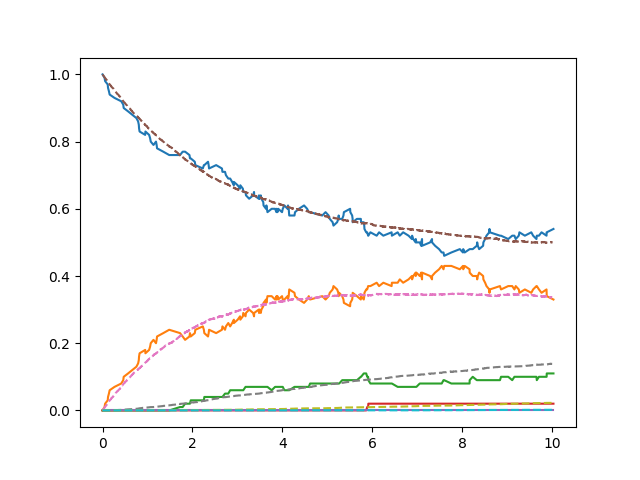

In [64]:

ddpp.set_initial_state(e(0))

#ddpp.set_initial_state(x_0) # We first need to define an initial stater
N=100
T,X = ddpp.simulate(100,time=10) # We first plot a trajectory for $N=100$
plt.plot(T,X)
N=1000
T,X = ddpp.simulate(10000,time=10) # Then for $N=1000$
plt.plot(T,X,'--')

<IPython.core.display.Javascript object>


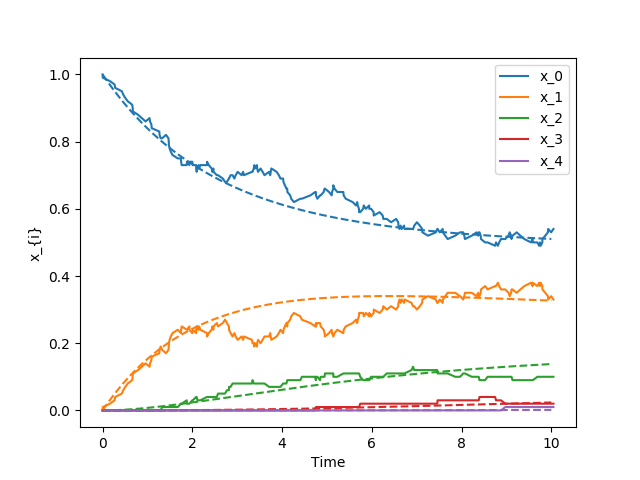

<IPython.core.display.Javascript object>


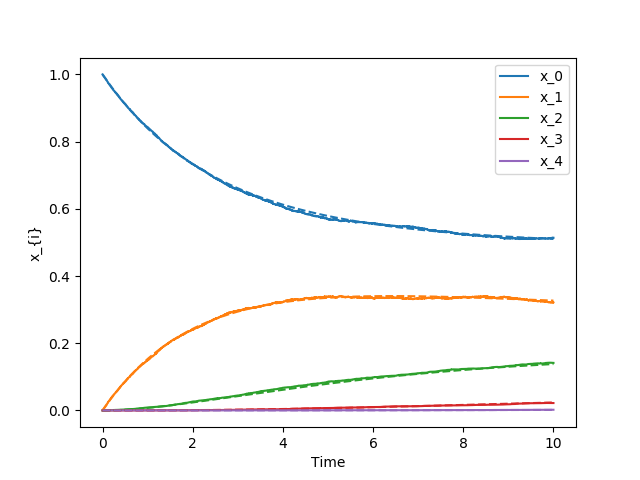

In [65]:
#N=100
plt.figure()
ddpp.plot_ODE_vs_simulation(N=100)


#N=1000
plt.figure()
ddpp.plot_ODE_vs_simulation(N=10000)


In [66]:

%time pi,K,W = ddpp.meanFieldExpansionSteadyState(order=1)
print(pi,K)

CPU times: user 780 ms, sys: 0 ns, total: 780 ms
Wall time: 778 ms
[0.47012289 0.26069618 0.14456326 0.08016433 0.04445334] [-0.02225738  0.06778223  0.01139642 -0.02358007 -0.03334121]


In [67]:
for N in [10,20,30,50]:
    Xm,Xrmf,Xs,Ks = ddpp.compare_refinedMF(N,time=10000)
    print('N =',N)
    print(Xm, 'mean-field')
    print(Xrmf,'Refined mean-field')
    print(Xs, 'Simulation')
    print(' ')
    print(abs(Xs-Xrmf),'Diference rmf')
    print(abs(Xs-Xm),'Diference mf')
    print('')

N = 10
[0.46952472 0.26070679 0.14475922 0.08037854 0.04463073] mean-field
[0.4672855  0.26766317 0.14588558 0.07794682 0.04121893] Refined mean-field
[0.46670229 0.27793232 0.13592385 0.06758349 0.03384043] Simulation
 
[0.0005832  0.01026916 0.00996174 0.01036332 0.00737851] Diference rmf
[0.00282242 0.01722553 0.00883537 0.01279505 0.01079031] Diference mf

N = 20
[0.46986432 0.26070084 0.14464798 0.08025689 0.04452996] mean-field
[0.46874815 0.26413352 0.14521447 0.07905983 0.04284403] Refined mean-field
[0.46207739 0.25443121 0.1425242  0.0805581  0.05098924] Simulation
 
[0.00667076 0.00970231 0.00269027 0.00149828 0.0081452 ] Diference rmf
[0.00778693 0.00626963 0.00212379 0.00030121 0.00645928] Diference mf

N = 30
[0.46996036 0.26069912 0.14461652 0.08022251 0.04450149] mean-field
[0.469217   0.26297762 0.14499493 0.07942859 0.04338187] Refined mean-field
[0.46097127 0.26334571 0.14805163 0.07497986 0.04576645] Simulation
 
[0.00824572 0.00036809 0.0030567  0.00444873 0.002384